In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD, Ftrl, Adadelta, Adagrad, Adamax
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform, LecunNormal, LecunUniform, RandomNormal, RandomUniform, TruncatedNormal, VarianceScaling
from tensorflow.keras.layers import Dense, Dropout, Input

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy import sqrt

import os

In [164]:
pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=0, header=1).drop('Unnamed: 3', axis=1)

,VH,VV,E,TD,HD,VD
0,1.0,1.0,0.296,0.075670,0.065,0.039
1,3.0,1.0,0.427,0.085855,0.076,0.039
2,5.0,1.0,0.538,0.082298,0.072,0.039
3,7.0,1.0,0.541,0.053310,0.036,0.039
4,9.0,1.0,0.557,0.088335,0.079,0.039
...,...,...,...,...,...,...
927641,NaN,NaN,NaN,0.000000,NaN,NaN
927642,NaN,NaN,NaN,0.000000,NaN,NaN
927643,NaN,NaN,NaN,0.000000,NaN,NaN
927644,NaN,NaN,NaN,0.000000,NaN,NaN


In [165]:
pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=1, header=1).drop('Unnamed: 3', axis=1)

,VH,VV,E,TD,HD,VD
0,1,1,0.544,0.163716,0.159003,0.039
1,3,1,0.822,0.148624,0.143684,0.038
2,5,1,0.960,0.150867,0.146003,0.038
3,7,1,0.915,0.153052,0.148000,0.039
4,9,1,1.051,0.155711,0.151003,0.038
...,...,...,...,...,...,...
41595,95,15,0.219,3.560913,0.639604,-3.503
41596,97,15,0.162,3.362438,0.670046,-3.295
41597,99,15,0.157,2.767855,2.325515,-1.501
41598,101,15,0.141,1.083850,0.573001,-0.920


In [166]:
pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=2, header=1).drop('Unnamed: 3', axis=1)

,VH,VV,E,TD,HD,VD
0,1,1,0.761,0.091799,0.074953,0.039
1,3,1,1.183,0.155885,0.127279,0.038
2,5,1,1.278,0.008660,0.007071,0.039
3,7,1,1.352,0.000000,0.000000,0.039
4,9,1,1.377,0.001732,0.001414,0.038
...,...,...,...,...,...,...
39595,91,15,0.250,0.195722,0.159806,-5.325
39596,93,15,0.250,0.064086,0.052326,-4.766
39597,95,15,0.183,2.876936,2.349009,-4.385
39598,97,15,0.170,0.001732,0.001414,-4.593


In [324]:
df = pd.DataFrame()

In [325]:
df = df.append(pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=0, header=1).drop('Unnamed: 3', axis=1), ignore_index=True)
df = df.append(pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=1, header=1).drop('Unnamed: 3', axis=1), ignore_index=True)
df = df.append(pd.read_excel('./EXAMPLE DATASET.xlsx', sheet_name=2, header=1).drop('Unnamed: 3', axis=1), ignore_index=True)
df.dropna(inplace=True)

In [169]:
df.shape

(1008846, 6)

In [170]:
df.head()

,VH,VV,E,TD,HD,VD
0,1.0,1.0,0.296,0.075670,0.065,0.039
1,3.0,1.0,0.427,0.085855,0.076,0.039
2,5.0,1.0,0.538,0.082298,0.072,0.039
3,7.0,1.0,0.541,0.053310,0.036,0.039
4,9.0,1.0,0.557,0.088335,0.079,0.039


In [171]:
df.tail()

,VH,VV,E,TD,HD,VD
1008841,91.0,15.0,0.250,0.195722,0.159806,-5.325
1008842,93.0,15.0,0.250,0.064086,0.052326,-4.766
1008843,95.0,15.0,0.183,2.876936,2.349009,-4.385
1008844,97.0,15.0,0.170,0.001732,0.001414,-4.593
1008845,99.0,15.0,0.145,7.260757,5.928383,-1.964


In [172]:
n_df = df.dropna()
n_df.shape

(85251, 6)

In [173]:
df = df[(pd.notna(df['VH'])) | (pd.notna(df['VV'])) | (pd.notna(df['E'])) | (pd.notna(df['TD'])) | (pd.notna(df['HD'])) | (pd.notna(df['VD']))].reset_index().drop('index', axis=1)

Wall time: 8.43 s


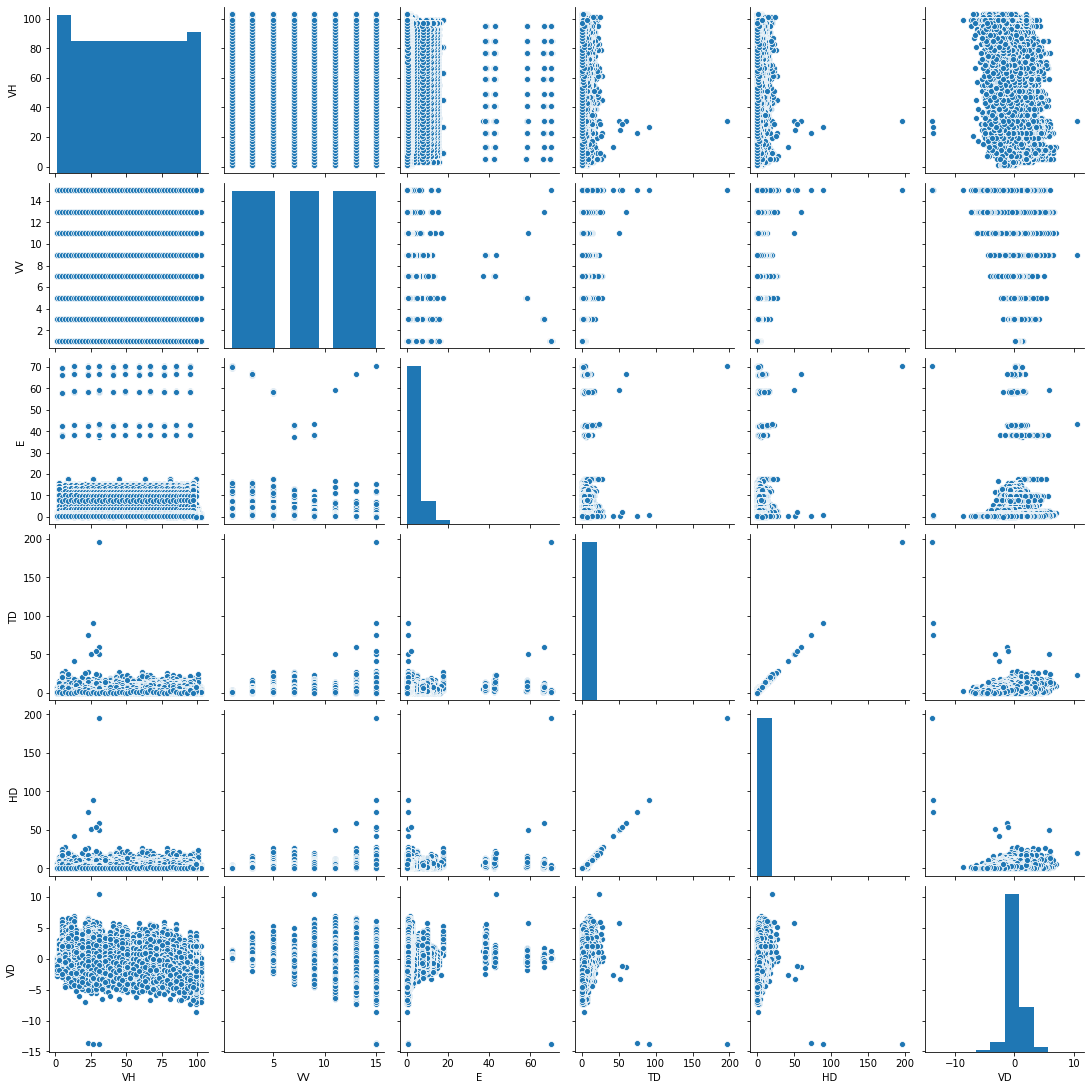

In [174]:
%%time
sns.pairplot(df)

In [176]:
def train_val_test_split(X, y, val_size=0.1, test_size=0.15):
    X = X.dropna().values
    y = y.dropna().values
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [177]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(df[['VH','VV','E']], df[['TD','HD','VD']])

In [178]:
print(f'{X_train.shape=}\n{X_val.shape=}\n{X_test.shape=}\n{y_train.shape=}\n{y_val.shape=}\n{y_test.shape=}')

X_train.shape=(65216, 3)
X_val.shape=(8526, 3)
X_test.shape=(11509, 3)
y_train.shape=(65216, 3)
y_val.shape=(8526, 3)
y_test.shape=(11509, 3)


In [232]:
def model(input_shape=(3,), layers=[3,6,12,6], output_neurons=3, hidden_activation='tanh', output_activation='linear', loss=MeanSquaredError(), optimizer=Adam(learning_rate=1e-3), metrics=[RootMeanSquaredError()]):
    m = Sequential()
    m.add(Input(shape=input_shape))
    for layer in layers:
        if layer > 0 and layer < 1:
            m.add(Dropout(layer))
            continue
        m.add(Dense(layer, activation=hidden_activation))
    m.add(Dense(output_neurons, activation=output_activation))
    m.compile(loss=loss, optimizer=optimizer, metrics=metrics)
#     m.summary()
    return m

In [225]:
def get_min_max(obj):
    minimum = None
    maximum = None
    for i in range(len(obj)):
        mn = min(obj[i])
        mx = max(obj[i])
        minimum = mn if minimum == None else min([minimum, mn])
        maximum = mx if maximum == None else max([maximum, mx])
    return minimum, maximum
get_min_max([get_min_max(y_train), get_min_max(y_val), get_min_max(y_test)])

(-13.833, 196.33393510547276)

In [231]:
%%time
m = model(layers=[3,6,12,24,48,96,96,48,24,12,6], optimizer=Nadam(learning_rate=1e-2), hidden_activation='relu', output_activation='linear')
m.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
print(f'{sqrt(mean_squared_error(y_test, m.predict(X_test))):.4f}')

Epoch 1/10
2038/2038 [==============================] - 2s 802us/step - loss: 5.6977 - root_mean_squared_error: 2.3501 - val_loss: 4.5016 - val_root_mean_squared_error: 2.1217
Epoch 2/10
2038/2038 [==============================] - 1s 729us/step - loss: 4.9157 - root_mean_squared_error: 2.2171 - val_loss: 4.2140 - val_root_mean_squared_error: 2.0528
Epoch 3/10
2038/2038 [==============================] - 1s 731us/step - loss: 4.7329 - root_mean_squared_error: 2.1755 - val_loss: 4.2578 - val_root_mean_squared_error: 2.0635
Epoch 4/10
2038/2038 [==============================] - 2s 790us/step - loss: 4.7332 - root_mean_squared_error: 2.1756 - val_loss: 4.0519 - val_root_mean_squared_error: 2.0129
Epoch 5/10
2038/2038 [==============================] - 1s 721us/step - loss: 4.7003 - root_mean_squared_error: 2.1680 - val_loss: 4.0371 - val_root_mean_squared_error: 2.0093
Epoch 6/10
2038/2038 [==============================] - 1s 727us/step - loss: 4.8423 - root_mean_squared_error: 2.2005 -

In [219]:
# saved weights for these parameter
# model(layers=[3,6,12,24,48,96,96,48,24,12,6], optimizer=Nadam(learning_rate=3e-3), hidden_activation='relu', output_activation='linear')
m.save_weights('best_weights.h5')

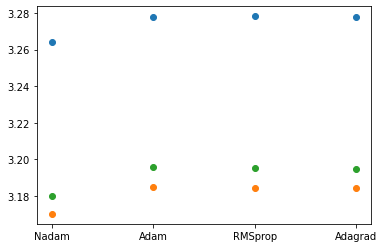

In [214]:
# test done on these parameters
# model(layers=[3,6,12,24,48,96,96,48,24,12,6], optimizer=[Nadam](learning_rate=1e-3), hidden_activation='relu', output_activation='tanh')
optims_loss = {
    'Nadam': [3.2643, 3.1702, 3.1802],
    'Adam': [3.2778, 3.1849, 3.1957],
    'RMSprop': [3.2782, 3.1843, 3.1953],
    'SGD': [3.2814, 3.1873, 3.1979],
    'Ftrl': [3.6849, 3.5934, 3.5978],
    'Adadelta': [3.2931, 3.1985, 3.2086],
    'Adagrad': [3.2779, 3.1843, 3.1947],
    'Adamax': [3.2849, 3.1914, 3.2015]
}
optim_loss = pd.DataFrame(optims_loss)
optim_loss.index = ['Train', 'Val', 'Test']
optim_loss = optim_loss.T
optim_loss.drop(['Ftrl', 'Adadelta', 'Adamax', 'SGD'], axis=0, inplace=True)
plt.scatter(optim_loss.index, optim_loss['Train'])
plt.scatter(optim_loss.index, optim_loss['Val'])
plt.scatter(optim_loss.index, optim_loss['Test'])
plt.show()

In [84]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge, LinearRegression, Hinge, Huber

In [122]:
morr = MultiOutputRegressor(estimator=Ridge())
morr.fit(X_train, y_train)
sqrt(mean_squared_error(y_test, morr.predict(X_test)))

2.445373047806278

In [123]:
sqrt(mean_squared_error(y_val, morr.predict(X_val)))

2.3057380532122096

In [124]:
sqrt(mean_squared_error(y_train, morr.predict(X_train)))

2.4677407566589764

In [119]:
morlr = MultiOutputRegressor(estimator=LinearRegression())
morlr.fit(X_train, y_train)
sqrt(mean_squared_error(y_test, morlr.predict(X_test)))

2.445373057211361

In [120]:
sqrt(mean_squared_error(y_val, morlr.predict(X_val)))

2.3057380513380883

In [121]:
sqrt(mean_squared_error(y_train, morlr.predict(X_train)))

2.467740756658868

In [282]:
# start, end = 1, 2
for i in range(0,20):
    start = i
    end = start + 1
    fig = go.Figure(data=[go.Scatter3d(x=y_train.T[0][start:end], y=y_train.T[1][start:end], z=y_train.T[2][start:end], mode='markers', name='actual'), go.Scatter3d(x=m.predict(X_test).T[0][start:end], y=m.predict(X_test).T[1][start:end], z=m.predict(X_test).T[2][start:end], mode='markers', name='predicted')])
    fig.show()
#     fig.write_html(f'Data Point: {i}.png')

In [302]:
%%time
plots_folder = 'plots'
if not os.path.isdir(plots_folder):
    os.mkdir(plots_folder)
for i in range(0,50):
    start = i
    end = start + 1
    fig = go.Figure(data=[go.Scatter3d(x=y_train.T[0][start:end], y=y_train.T[1][start:end], z=y_train.T[2][start:end], mode='markers', name='actual'), go.Scatter3d(x=m.predict(X_test).T[0][start:end], y=m.predict(X_test).T[1][start:end], z=m.predict(X_test).T[2][start:end], mode='markers', name='predicted')])
#     fig.show()
    fig.write_html(f'{plots_folder}/Data_{i if i > 9 else "0" + str(i)}.html')

Wall time: 19.6 s


In [327]:
df

,VH,VV,E,TD,HD,VD
0,1.0,1.0,0.296,0.075670,0.065000,0.039
1,3.0,1.0,0.427,0.085855,0.076000,0.039
2,5.0,1.0,0.538,0.082298,0.072000,0.039
3,7.0,1.0,0.541,0.053310,0.036000,0.039
4,9.0,1.0,0.557,0.088335,0.079000,0.039
...,...,...,...,...,...,...
1008841,91.0,15.0,0.250,0.195722,0.159806,-5.325
1008842,93.0,15.0,0.250,0.064086,0.052326,-4.766
1008843,95.0,15.0,0.183,2.876936,2.349009,-4.385
1008844,97.0,15.0,0.170,0.001732,0.001414,-4.593


In [332]:
df['VH'].nunique()

52

In [333]:
df.nunique() / df.shape[0]

VH    0.000610
VV    0.000094
E     0.109371
TD    0.670139
HD    0.649283
VD    0.152620
dtype: float64

In [334]:
df.shape[0]

85251

In [335]:
df['VV'].nunique()

8

In [336]:
df['E'].nunique()

9324

In [337]:
df['VV'].unique()

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15.])

In [338]:
df['VH'].unique()

array([  1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,
        23.,  25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,
        45.,  47.,  49.,  51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,
        67.,  69.,  71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  87.,
        89.,  91.,  93.,  95.,  97.,  99., 101., 103.])

In [339]:
df['E'].unique()

array([0.296, 0.427, 0.538, ..., 0.183, 0.256, 0.238])

In [340]:
df['VV_CAT'] = df['VV'].astype('category')
df['VH_CAT'] = df['VH'].astype('category')
df['VV_CAT_CODES'] = df['VV_CAT'].cat.codes
df['VH_CAT_CODES'] = df['VH_CAT'].cat.codes

In [341]:
df

,VH,VV,E,TD,HD,VD,VV_CAT,VH_CAT,VV_CAT_CODES,VH_CAT_CODES
0,1.0,1.0,0.296,0.075670,0.065000,0.039,1.0,1.0,0,0
1,3.0,1.0,0.427,0.085855,0.076000,0.039,1.0,3.0,0,1
2,5.0,1.0,0.538,0.082298,0.072000,0.039,1.0,5.0,0,2
3,7.0,1.0,0.541,0.053310,0.036000,0.039,1.0,7.0,0,3
4,9.0,1.0,0.557,0.088335,0.079000,0.039,1.0,9.0,0,4
...,...,...,...,...,...,...,...,...,...,...
1008841,91.0,15.0,0.250,0.195722,0.159806,-5.325,15.0,91.0,7,45
1008842,93.0,15.0,0.250,0.064086,0.052326,-4.766,15.0,93.0,7,46
1008843,95.0,15.0,0.183,2.876936,2.349009,-4.385,15.0,95.0,7,47
1008844,97.0,15.0,0.170,0.001732,0.001414,-4.593,15.0,97.0,7,48


In [342]:
df.drop(['VV_CAT', 'VH_CAT', 'VV_CAT_CODES', 'VH_CAT_CODES'], axis=1, inplace=True)

In [343]:
df

,VH,VV,E,TD,HD,VD
0,1.0,1.0,0.296,0.075670,0.065000,0.039
1,3.0,1.0,0.427,0.085855,0.076000,0.039
2,5.0,1.0,0.538,0.082298,0.072000,0.039
3,7.0,1.0,0.541,0.053310,0.036000,0.039
4,9.0,1.0,0.557,0.088335,0.079000,0.039
...,...,...,...,...,...,...
1008841,91.0,15.0,0.250,0.195722,0.159806,-5.325
1008842,93.0,15.0,0.250,0.064086,0.052326,-4.766
1008843,95.0,15.0,0.183,2.876936,2.349009,-4.385
1008844,97.0,15.0,0.170,0.001732,0.001414,-4.593


In [346]:
pd.get_dummies(df, columns=['VH', 'VV'])

,E,TD,HD,VD,VH_1.0,VH_3.0,VH_5.0,VH_7.0,VH_9.0,VH_11.0,...,VH_101.0,VH_103.0,VV_1.0,VV_3.0,VV_5.0,VV_7.0,VV_9.0,VV_11.0,VV_13.0,VV_15.0
0,0.296,0.075670,0.065000,0.039,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.427,0.085855,0.076000,0.039,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.538,0.082298,0.072000,0.039,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.541,0.053310,0.036000,0.039,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.557,0.088335,0.079000,0.039,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008841,0.250,0.195722,0.159806,-5.325,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008842,0.250,0.064086,0.052326,-4.766,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008843,0.183,2.876936,2.349009,-4.385,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1008844,0.170,0.001732,0.001414,-4.593,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [348]:
df['E'].nunique()

9324

In [349]:
df.shape[0]

85251